In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import statsmodels.api as sat
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

from scipy.stats import pearsonr

In [44]:
data = pd.read_csv('/Users/sazid/Downloads/auto-mpg[1].csv')




In [58]:
data['horsepower']=pd.to_numeric(data['horsepower'], errors='coerce')
data=data.dropna(subset=['horsepower'])

data = data.drop(['car name'], axis=1)

In [59]:
data.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [10]:
cor, p_val = pearsonr(data['mpg'],data['cylinders'])
cor,p_val

(-0.7753962854205523, 4.503992246184411e-81)

In [11]:
cor, p_val = pearsonr(data['mpg'],data['displacement'])
cor,p_val

(-0.8042028248058991, 1.6558889101909724e-91)

In [55]:
cor, p_val = pearsonr(data['mpg'],data['horsepower'])
cor,p_val

(-0.7784267838977776, 7.0319890293952315e-81)

In [13]:
cor, p_val = pearsonr(data['mpg'],data['weight'])
cor,p_val

(-0.831740933244335, 2.972799564049635e-103)

In [14]:
cor, p_val = pearsonr(data['mpg'],data['acceleration'])
cor,p_val

(0.42028891210165065, 1.823091535078706e-18)

In [15]:
cor, p_val = pearsonr(data['mpg'],data['model year'])
cor,p_val

(0.5792671330833103, 4.844935813364392e-37)

In [16]:
cor, p_val = pearsonr(data['mpg'],data['origin'])
cor,p_val

(0.5634503597738438, 1.0114822102334133e-34)

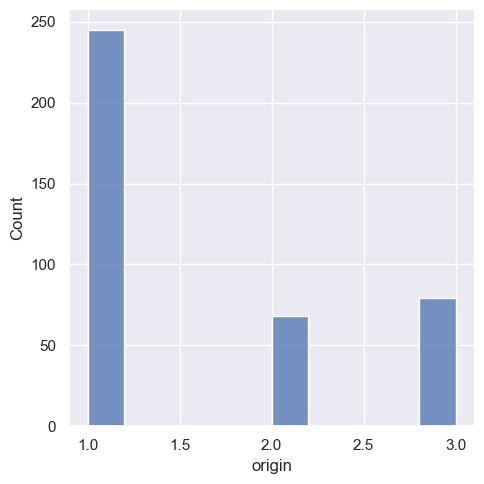

In [68]:
sns.displot(data['origin'])

In [77]:
target = pd.DataFrame(data['mpg'].values, columns=['target'])

test = data.drop(['mpg'],axis=1)

In [81]:
reg = LinearRegression()
reg.fit(test,target)

LinearRegression()

In [82]:
reg.score(test,target)

0.8214780764810597

In [85]:
y_hat= pd.DataFrame(reg.predict(test), columns=['y_hat'])

In [87]:
x = pd.DataFrame(y_hat.values-target.values, columns=['Residual'])

In [112]:
final = pd.DataFrame(target)
final['predict']=y_hat.values
final['Residual']=abs(x.values)
final['%']= final['Residual']*100/final['target']

In [118]:
with pd.option_context('display.max_rows', None):
 display(final.sort_values(by='%').head(400))

,target,predict,Residual,%
287,16.9,16.881536,0.018464,0.109257
263,17.5,17.464411,0.035589,0.203368
312,26.4,26.467622,0.067622,0.256145
317,31.3,31.217496,0.082504,0.263591
350,33.7,33.609223,0.090777,0.269369
182,25.0,25.068149,0.068149,0.272597
338,30.0,29.907638,0.092362,0.307873
219,17.5,17.568357,0.068357,0.390609
176,23.0,23.090111,0.090111,0.391789
141,26.0,26.103257,0.103257,0.397143


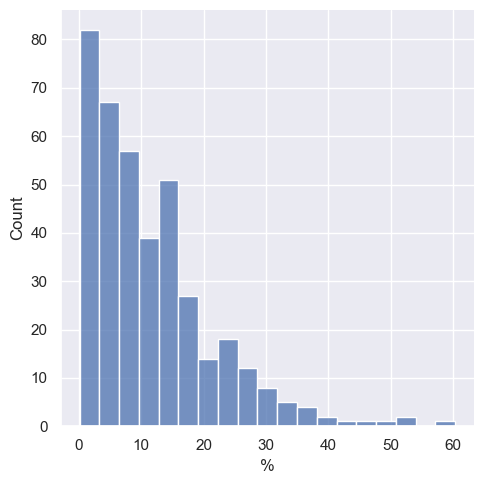

In [120]:
sns.displot(final['%'].head(400))